In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df =pd.read_csv("../data/bank_data_project.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [4]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.5


In [5]:
# Convert to datetime if needed
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')
unique_dates = df["TransactionDate"].unique()
print(unique_dates)

<DatetimeArray>
['2016-02-08 00:00:00', '2016-01-08 00:00:00', '2016-03-08 00:00:00',
 '2016-05-08 00:00:00', '2016-04-08 00:00:00', '2016-06-08 00:00:00',
 '2016-09-08 00:00:00', '2016-08-08 00:00:00', '2016-12-08 00:00:00',
 '2016-07-08 00:00:00',                 'NaT', '2016-10-08 00:00:00',
 '2016-11-08 00:00:00', '2016-03-09 00:00:00', '2016-02-09 00:00:00',
 '2016-01-09 00:00:00', '2016-06-09 00:00:00', '2016-05-09 00:00:00',
 '2016-04-09 00:00:00', '2016-09-09 00:00:00', '2016-08-09 00:00:00',
 '2016-07-09 00:00:00', '2016-12-09 00:00:00', '2016-11-09 00:00:00',
 '2016-10-09 00:00:00']
Length: 25, dtype: datetime64[ns]


In [6]:
# Convert to datetime if needed
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
unique_dates = df["CustomerDOB"].unique()
print(unique_dates)

<DatetimeArray>
['1994-10-01 00:00:00', '1957-04-04 00:00:00',                 'NaT',
 '1972-08-10 00:00:00', '1988-07-07 00:00:00', '1992-05-01 00:00:00',
 '1968-10-07 00:00:00', '1800-01-01 00:00:00', '1991-11-01 00:00:00',
 '1986-01-10 00:00:00',
 ...
 '1998-04-02 00:00:00', '1959-09-03 00:00:00', '1998-02-06 00:00:00',
 '1957-08-05 00:00:00', '1965-10-02 00:00:00', '2004-07-03 00:00:00',
 '1945-07-06 00:00:00', '1954-09-06 00:00:00', '1946-06-04 00:00:00',
 '1950-07-01 00:00:00']
Length: 7062, dtype: datetime64[ns]


In [7]:
 #Check for invalid dates (NaT values)
invalid_dates = df[df["CustomerDOB"].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")
print("Invalid entries:")
print(invalid_dates)

Number of invalid dates: 560396
Invalid entries:
        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
2                  T3   C4417068         NaT          F         MUMBAI   
3                  T4   C5342380         NaT          F         MUMBAI   
4                  T5   C9031234         NaT          F    NAVI MUMBAI   
6                  T7   C7126560         NaT          F         MUMBAI   
7                  T8   C1220223         NaT          M         MUMBAI   
...               ...        ...         ...        ...            ...   
1041607      T1048561   C5028150         NaT          M           PUNE   
1041608      T1048562   C1034220         NaT          M      BANGALORE   
1041610      T1048564   C6459278         NaT          M         NASHIK   
1041611      T1048565   C6412354         NaT          M      HYDERABAD   
1041612      T1048566   C6420483         NaT          M  VISAKHAPATNAM   

         CustAccountBalance TransactionDate  TransactionTime  

In [8]:
# Count NaT values
nat_count = df["CustomerDOB"].isna().sum()
total_count = len(df)
print(f"Invalid dates (NaT): {nat_count}")
print(f"Total rows: {total_count}")
print(f"Percentage invalid: {(nat_count/total_count)*100:.2f}%")

Invalid dates (NaT): 560396
Total rows: 1041614
Percentage invalid: 53.80%


In [9]:
# Check what the original date values actually look like
print("Sample of original CustomerDOB values that became NaT:")
original_dob_sample = df.loc[df["CustomerDOB"].isna(), "CustomerDOB"].head(20)
print(original_dob_sample.tolist())

# Or if you have the original data before conversion, check that

Sample of original CustomerDOB values that became NaT:
[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT]


In [10]:
df["CustomerDOB"] = df["CustomerDOB"].bfill()

In [11]:
# Convert to datetime if needed
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
unique_dates = df["CustomerDOB"].unique()
print(unique_dates)

<DatetimeArray>
['1994-10-01 00:00:00', '1957-04-04 00:00:00', '1972-08-10 00:00:00',
 '1988-07-07 00:00:00', '1992-05-01 00:00:00', '1968-10-07 00:00:00',
 '1800-01-01 00:00:00', '1991-11-01 00:00:00', '1986-01-10 00:00:00',
 '1986-01-02 00:00:00',
 ...
 '1998-04-02 00:00:00', '1959-09-03 00:00:00', '1998-02-06 00:00:00',
 '1957-08-05 00:00:00', '1965-10-02 00:00:00', '2004-07-03 00:00:00',
 '1945-07-06 00:00:00', '1954-09-06 00:00:00', '1946-06-04 00:00:00',
 '1950-07-01 00:00:00']
Length: 7061, dtype: datetime64[ns]


In [12]:
# Convert to datetime 
print(df["CustomerDOB"])

0         1994-10-01
1         1957-04-04
2         1972-08-10
3         1972-08-10
4         1972-08-10
             ...    
1041609   1990-08-04
1041610   1984-05-03
1041611   1984-05-03
1041612   1984-05-03
1041613   1984-05-03
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]


In [13]:
# Count NaT values
nat_count = df["CustomerDOB"].isna().sum()
total_count = len(df)
print(f"Invalid dates (NaT): {nat_count}")
print(f"Total rows: {total_count}")
print(f"Percentage invalid: {(nat_count/total_count)*100:.2f}%")

Invalid dates (NaT): 0
Total rows: 1041614
Percentage invalid: 0.00%


In [14]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1972-08-10,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1972-08-10,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [15]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1.041614e+06,538378,1.041614e+06,1.041614e+06
mean,1963-09-24 01:54:37.317700992,1.149986e+05,2016-06-24 11:52:07.540872448,1.571221e+05,1.566096e+03
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,1977-10-02 00:00:00,4.728140e+03,2016-04-08 00:00:00,1.240410e+05,1.600000e+02
50%,1986-05-10 00:00:00,1.676852e+04,2016-07-08 00:00:00,1.642470e+05,4.575000e+02
75%,1990-11-02 00:00:00,5.742885e+04,2016-10-08 00:00:00,2.000220e+05,1.200000e+03
max,2029-06-05 00:00:00,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03


In [16]:
print(df['CustomerDOB'])

0         1994-10-01
1         1957-04-04
2         1972-08-10
3         1972-08-10
4         1972-08-10
             ...    
1041609   1990-08-04
1041610   1984-05-03
1041611   1984-05-03
1041612   1984-05-03
1041613   1984-05-03
Name: CustomerDOB, Length: 1041614, dtype: datetime64[ns]


In [17]:
print(df["CustomerDOB"].head(30).tolist())

[Timestamp('1994-10-01 00:00:00'), Timestamp('1957-04-04 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1972-08-10 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1988-07-07 00:00:00'), Timestamp('1992-05-01 00:00:00'), Timestamp('1992-05-01 00:00:00'), Timestamp('1968-10-07 00:00:00'), Timestamp('1968-10-07 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1991-11-01 00:00:00'), Timestamp('1991-11-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('1986-01-10 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1993-01-04 00:00:00'), Timestamp('1800-01-01 00:00:00'), Timestamp('18

In [18]:
df[df["CustomerDOB"].dt.year == 1800]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,124727,1423.11
19,T20,C8999019,1800-01-01,M,PUNE,10643.50,2016-01-08,152821,945.00
20,T21,C6121429,1800-01-01,M,NO 3 KALYANI NAGAR PUNE,2934.22,2016-01-08,152824,36.00
21,T22,C4511244,1800-01-01,F,SECUNDERABAD,4470.15,2016-03-08,105329,27.00
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00
...,...,...,...,...,...,...,...,...,...
1041578,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,NaT,184319,598.86
1041579,T1048533,C3422316,1800-01-01,F,BARODA,91662.32,NaT,183750,800.00
1041580,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,NaT,184049,520.00
1041586,T1048540,C7411577,1800-01-01,F,BANGALORE,10662.67,NaT,182350,695.00


In [19]:
df[df['CustomerDOB'].dt.year == 1800].shape


(121197, 9)

In [20]:
df.loc[df['CustomerDOB'].dt.year == 1800, 'CustomerDOB'] = pd.Timestamp('2020-01-01')


In [21]:
df['TransactionDate'].isnull().sum()

503236

In [22]:
df['CustomerDOB'].head(30)

0    1994-10-01
1    1957-04-04
2    1972-08-10
3    1972-08-10
4    1972-08-10
5    1972-08-10
6    1988-07-07
7    1988-07-07
8    1988-07-07
9    1988-07-07
10   1988-07-07
11   1988-07-07
12   1992-05-01
13   1992-05-01
14   1968-10-07
15   1968-10-07
16   2020-01-01
17   1991-11-01
18   1991-11-01
19   2020-01-01
20   2020-01-01
21   2020-01-01
22   2020-01-01
23   1986-01-10
24   1986-01-02
25   1986-01-02
26   1986-01-02
27   1993-01-04
28   2020-01-01
29   2020-01-01
Name: CustomerDOB, dtype: datetime64[ns]

In [23]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1.041614e+06,538378,1.041614e+06,1.041614e+06
mean,1989-04-29 13:16:31.929064192,1.149986e+05,2016-06-24 11:52:07.540872448,1.571221e+05,1.566096e+03
min,1930-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,1982-12-04 00:00:00,4.728140e+03,2016-04-08 00:00:00,1.240410e+05,1.600000e+02
50%,1988-09-02 00:00:00,1.676852e+04,2016-07-08 00:00:00,1.642470e+05,4.575000e+02
75%,1992-09-10 00:00:00,5.742885e+04,2016-10-08 00:00:00,2.000220e+05,1.200000e+03
max,2029-06-05 00:00:00,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03


In [24]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1972-08-10,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1972-08-10,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1972-08-10,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [25]:
import os
from datetime import datetime

# 1️⃣ Define folder name
output_folder = "../output"

# 2️⃣ Create folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"📁 Created new folder: {output_folder}")
else:
    print(f"📂 Folder already exists: {output_folder}")

# 3️⃣ Create timestamp for file naming
timestamp = datetime.now().strftime("%Y-%m-%d_%H%M")
filename = f"cleaned_data_{timestamp}.csv"

# 4️⃣ Build absolute path (prevents OSError)
output_path = os.path.abspath(os.path.join(output_folder, filename))

# 5️⃣ Print the exact path (for verification)
print(f"🔍 Saving file to: {output_path}")

# 6️⃣ Save dataframe safely
df.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved successfully at: {output_path}")


📂 Folder already exists: ../output
🔍 Saving file to: C:\Users\dell\desktop\banking_project\output\cleaned_data_2025-10-16_1348.csv
✅ Cleaned data saved successfully at: C:\Users\dell\desktop\banking_project\output\cleaned_data_2025-10-16_1348.csv


In [26]:

print("Current working directory:", os.getcwd())


Current working directory: C:\Users\dell\desktop\banking_project\notebook


## 🧠 Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before performing any modelling or prediction.  
It helps to identify **patterns, trends, relationships, and potential data quality issues** such as missing values or outliers.

### 🎯 Objectives of EDA
1. Understand the **structure and summary** of the data (data types, counts, and statistics).  
2. Detect **missing values**, duplicates, and outliers.  
3. Explore **distributions** of numerical and categorical features.  
4. Identify **relationships** between variables using correlation and visual plots.  
5. Generate **insights** to guide data cleaning, transformation, and model selection.
## Outlier Detection

Outliers are data points that deviate significantly from the majority of the dataset.  
They can result from data entry errors, unusual customer behaviour, or rare events.  
Detecting outliers helps improve the accuracy of analysis and prevents models from being skewed.

In this step, boxplots are used to visualize potential outliers in numerical features  
such as Transaction Amount and Customer Account Balance.

- Histograms, boxplots, and countplots → Visualize distributions  
- Scatter plots and heatmaps → Explore relationships and correlations  

### ✅ Outcome
EDA provides a clear understanding of data behaviour, quality, and key features that influence further analysis or machine learning tasks.


In [27]:
# Load the cleaned CSV file
df = pd.read_csv("../output/cleaned_data_2025-10-16_1230.csv")

# View first few rows
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_18068\364975008.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../output/cleaned_data_2025-10-16_1230.csv")


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [28]:

df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          538378 non-null   object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


TransactionID                   0
CustomerID                      0
CustomerDOB                     0
CustGender                      0
CustLocation                    0
CustAccountBalance              0
TransactionDate            503236
TransactionTime                 0
TransactionAmount (INR)         0
dtype: int64

## Data Summary Insights

- The dataset contains 1,041,614 transactions across 9 columns.
- Most fields are complete, except `TransactionDate`, which has approximately 48% missing values.
- Numerical variables include:
  - `CustAccountBalance` (float64)
  - `TransactionAmount (INR)` (float64)
  - `TransactionTime` (int64)
- Categorical features include:
  - `CustGender`, `CustLocation`, and ID-related columns.
- No duplicate column names or incorrect data types were detected, making the dataset suitable for further exploration and visualization.


## Exploratory Data Analysis (EDA) Visualizations

This section explores key patterns and relationships within the cleaned dataset.  
The goal is to understand the distribution of customer balances and transaction amounts,  
identify outliers, and observe any visible trends across gender and locations.


In [29]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


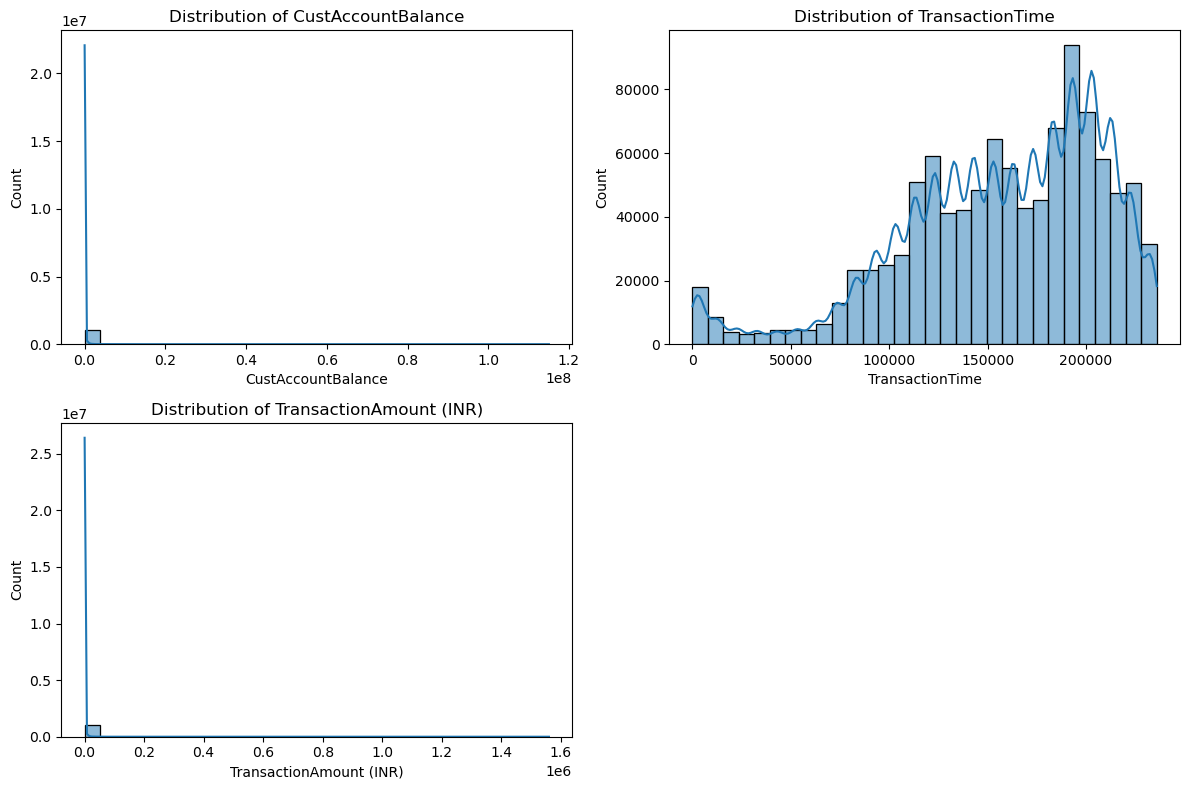

In [30]:
 # Set number of rows and columns (you can change these)
nrows = 2
ncols = 2

# Create the figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Flatten axes to make looping easier
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any empty subplots (if number of plots < nrows*ncols)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()









plt.subplots(nrows, ncols) gives you a grid of plots you can control.

axes.flatten() lets you easily iterate through them in a loop.

If you have fewer plots than spaces in the grid, the empty ones are automatically removed.

You can freely adjust nrows and ncols — e.g., (nrows=1, ncols=3) if you want them all side-by-side.





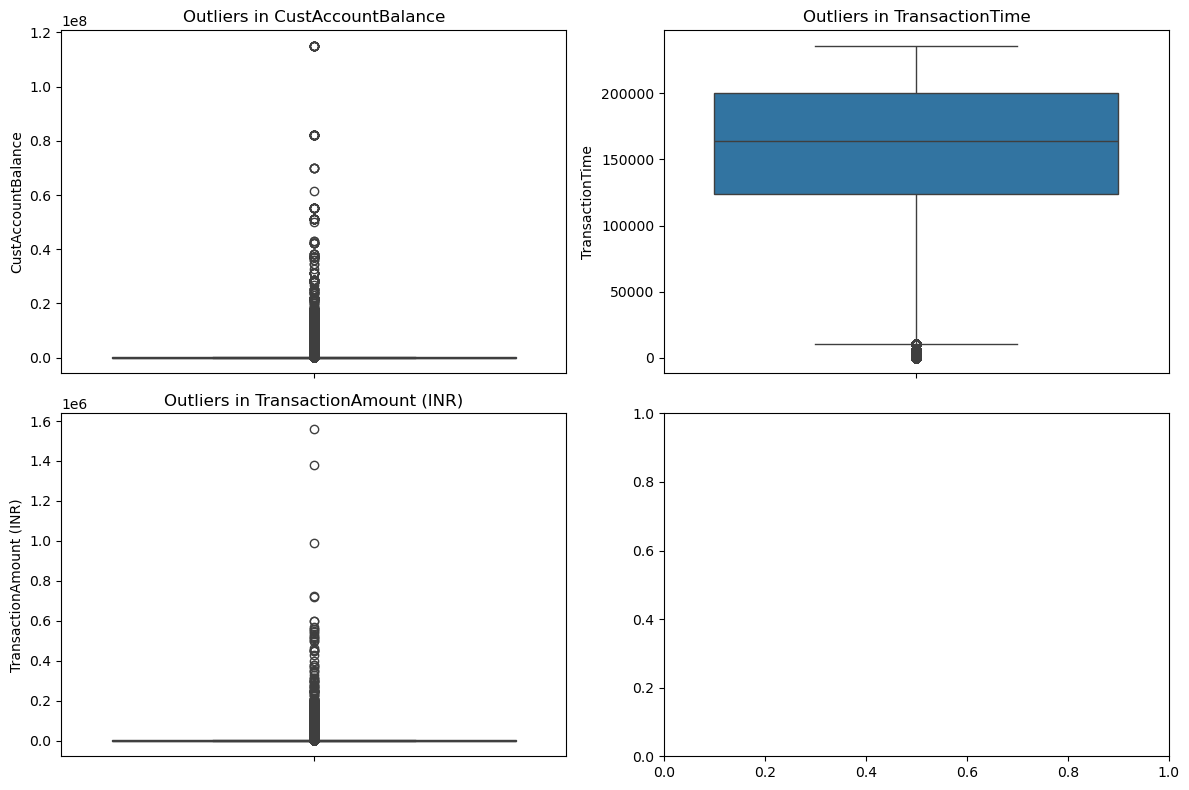

In [31]:
# Flatten the axes to loop easily
# Create subplots grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

axes = axes.flatten()

# Plot each numerical column
for idx, col in enumerate(num_cols):
    sns.boxplot(y=df[col], data=df, ax=axes[idx])
    axes[idx].set_title(f"Outliers in {col}")



plt.tight_layout()
plt.show()


In [32]:


# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    before = data.shape[0]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    after = data.shape[0]
    
    print(f"{column}: Removed {before - after} outliers ({(before - after) / before:.2%})")
    return data

# Apply IQR method to key numeric columns
clean_df = df.copy()
clean_df = remove_outliers_iqr(clean_df, 'CustAccountBalance')
clean_df = remove_outliers_iqr(clean_df, 'TransactionAmount (INR)')

# Verify new shape
print("\nNew dataset shape:", clean_df.shape)


CustAccountBalance: Removed 140263 outliers (13.47%)
TransactionAmount (INR): Removed 98612 outliers (10.94%)

New dataset shape: (802739, 9)


In [33]:
vis_folder = "../visualization"


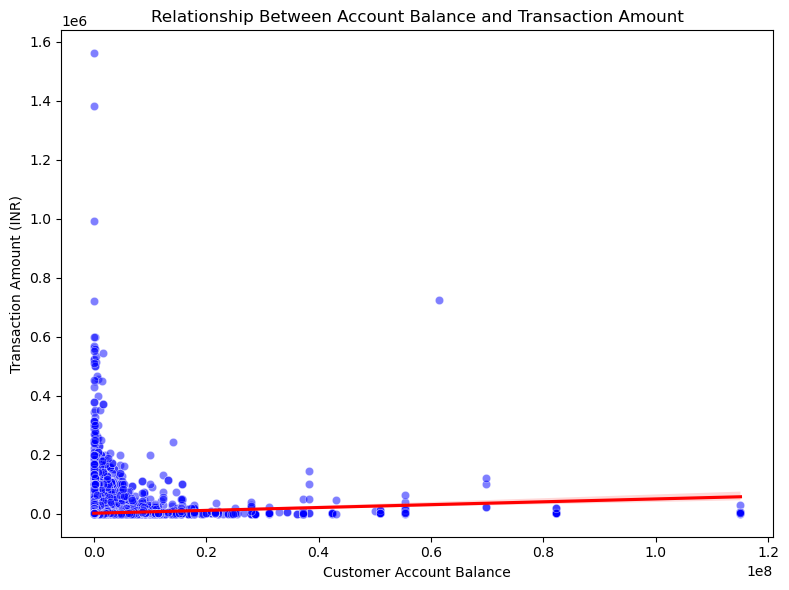

✅ Saved: balance_vs_transaction.png


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure folder path is correct
vis_folder = "../visualization"
os.makedirs(vis_folder, exist_ok=True)

plt.figure(figsize=(8, 6))

# Scatter points
sns.scatterplot(
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    data=df,
    alpha=0.5,
    color='blue'
)

# Add regression line (on same figure)
sns.regplot(
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    data=df,
    scatter=False,
    color='red'
)

plt.title("Relationship Between Account Balance and Transaction Amount")
plt.xlabel("Customer Account Balance")
plt.ylabel("Transaction Amount (INR)")
plt.tight_layout()

# Save and show
plt.savefig(os.path.join(vis_folder, "balance_vs_transaction.png"))
plt.show()

print("✅ Saved: balance_vs_transaction.png")


### Relationship Between Account Balance and Transaction Amount

The scatter plot shows that customers with higher account balances 
tend to make higher transaction amounts.  
The positive trend line indicates a weak but noticeable correlation between the two variables.


In [35]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create folder if missing
vis_folder = "../visualization"
os.makedirs(vis_folder, exist_ok=True)
print(f"📁 Visualization folder ready: {vis_folder}")


📁 Visualization folder ready: ../visualization


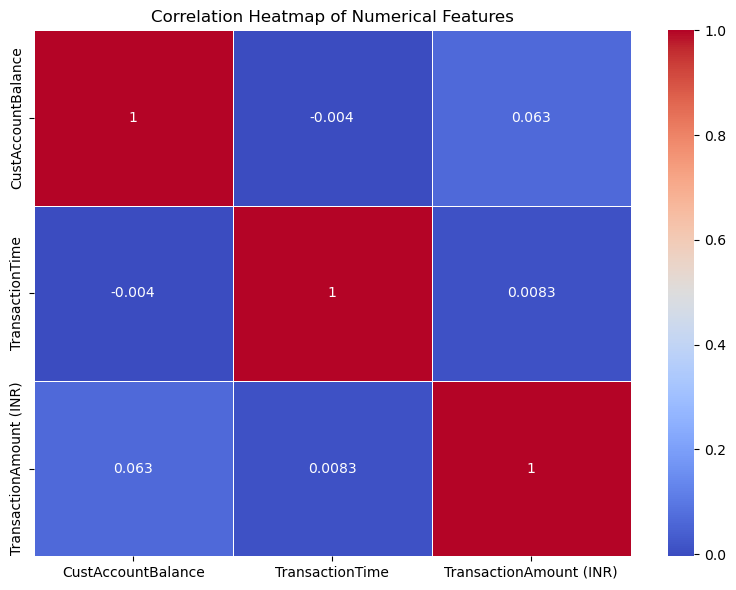

✅ Saved: correlation_heatmap.png


In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "correlation_heatmap.png"))
plt.show()
print("✅ Saved: correlation_heatmap.png")


C:\Users\dell\AppData\Local\Temp\ipykernel_18068\3129685029.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_18068\3129685029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=df, estimator='mean', ci=None, palette='viridis')


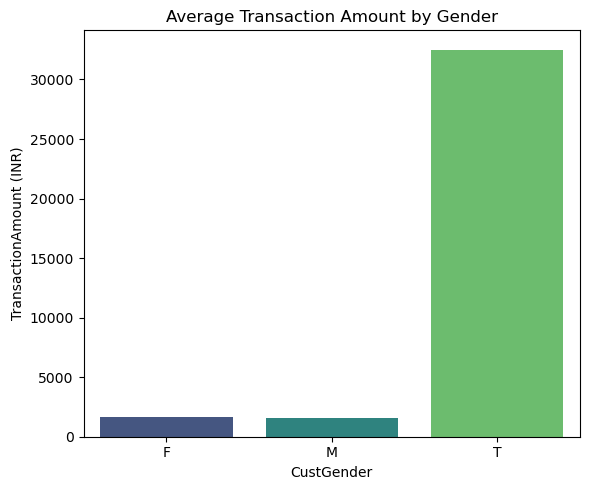

✅ Saved: avg_transaction_by_gender.png


In [37]:
plt.figure(figsize=(6,5))
sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=df, estimator='mean', ci=None, palette='viridis')
plt.title("Average Transaction Amount by Gender")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "avg_transaction_by_gender.png"))
plt.show()
print("✅ Saved: avg_transaction_by_gender.png")


C:\Users\dell\AppData\Local\Temp\ipykernel_18068\3874707629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='cool')


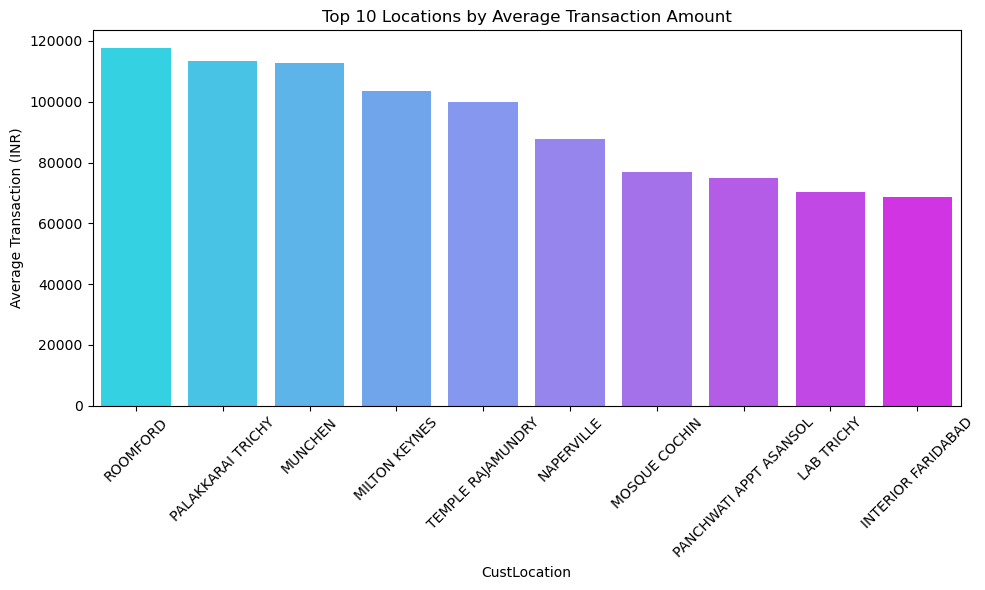

✅ Saved: top10_locations_transaction.png


In [38]:
top10 = df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.index, y=top10.values, palette='cool')
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Average Transaction Amount")
plt.ylabel("Average Transaction (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "top10_locations_transaction.png"))
plt.show()
print("✅ Saved: top10_locations_transaction.png")


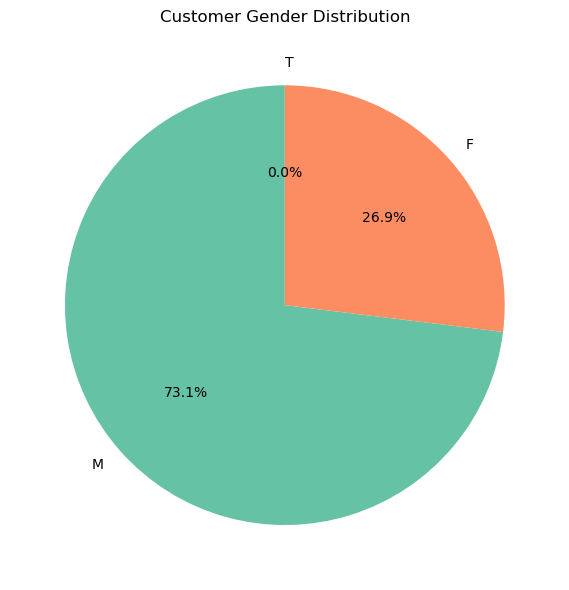

✅ Saved: gender_distribution.png


In [39]:
gender_counts = df['CustGender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Customer Gender Distribution")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "gender_distribution.png"))
plt.show()
print("✅ Saved: gender_distribution.png")


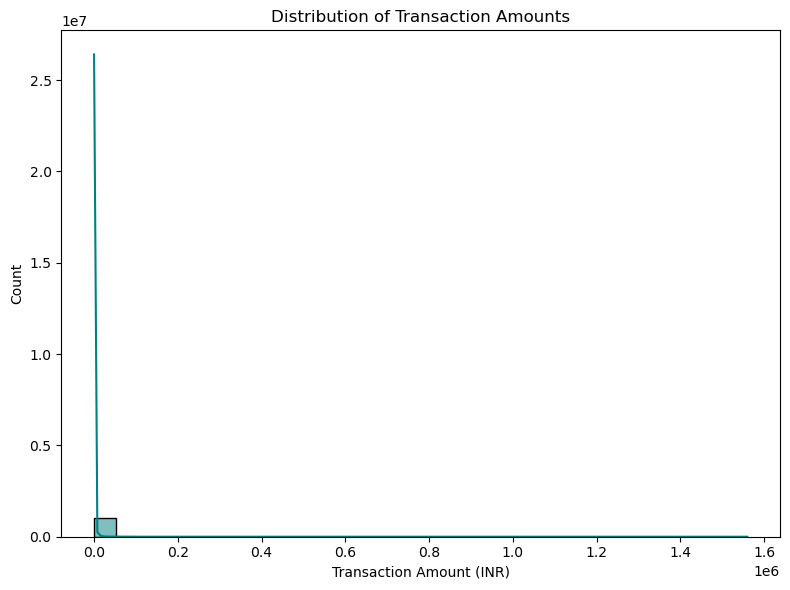

✅ Saved: transaction_amount_distribution.png


In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, bins=30, color='teal')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "transaction_amount_distribution.png"))
plt.show()
print("✅ Saved: transaction_amount_distribution.png")


C:\Users\dell\AppData\Local\Temp\ipykernel_18068\3874707629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='cool')


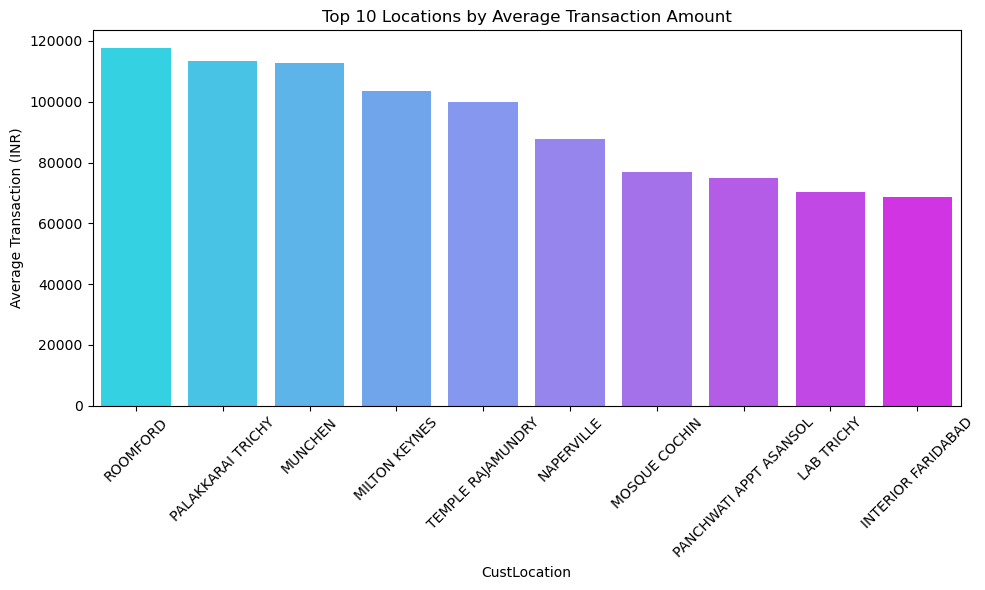

✅ Saved: top10_locations_transaction.png


In [41]:
top10 = df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.index, y=top10.values, palette='cool')
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Average Transaction Amount")
plt.ylabel("Average Transaction (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "top10_locations_transaction.png"))
plt.show()
print("✅ Saved: top10_locations_transaction.png")


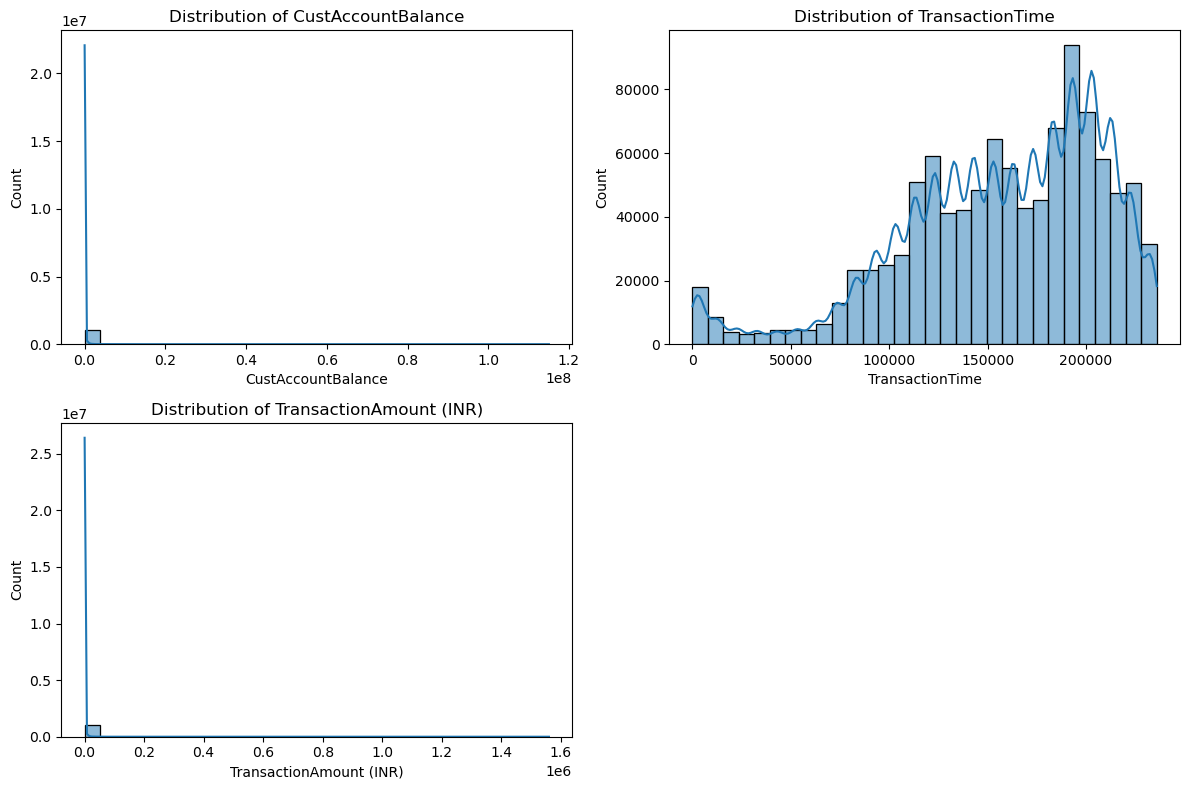

✅ Saved: histograms.png


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms for all numerical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "histograms.png"))
plt.show()
print("✅ Saved: histograms.png")


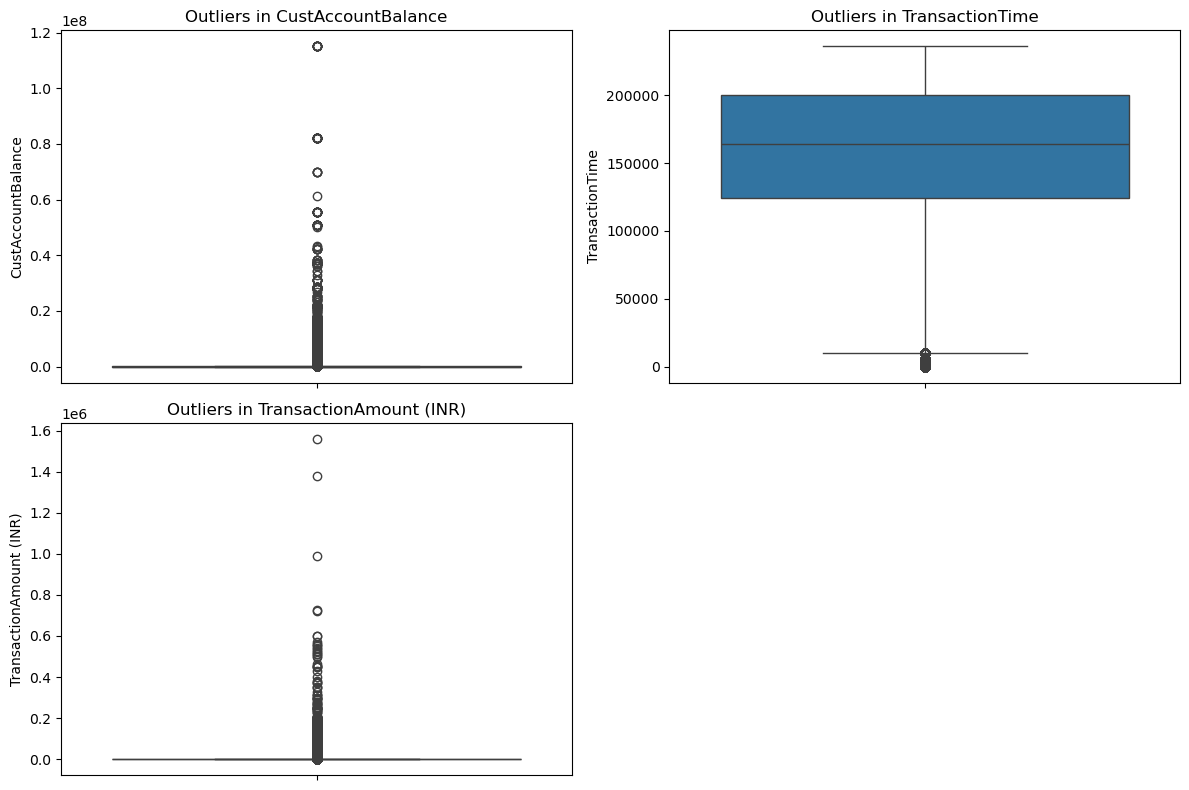

✅ Saved: boxplots.png


In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "boxplots.png"))
plt.show()
print("✅ Saved: boxplots.png")


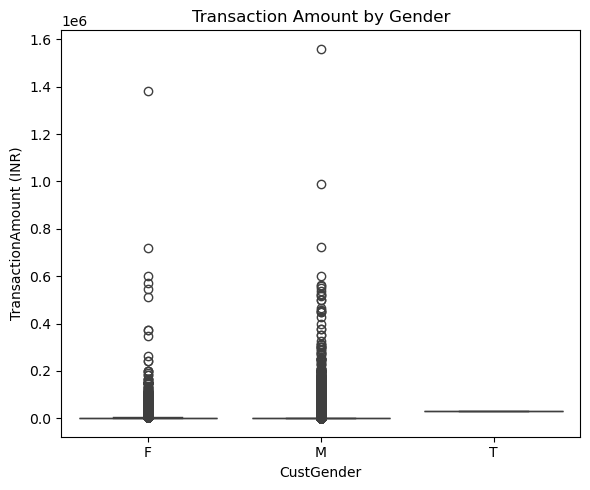

✅ Saved: gender_vs_transaction.png


In [45]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title("Transaction Amount by Gender")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "gender_vs_transaction.png"))
plt.show()
print("✅ Saved: gender_vs_transaction.png")


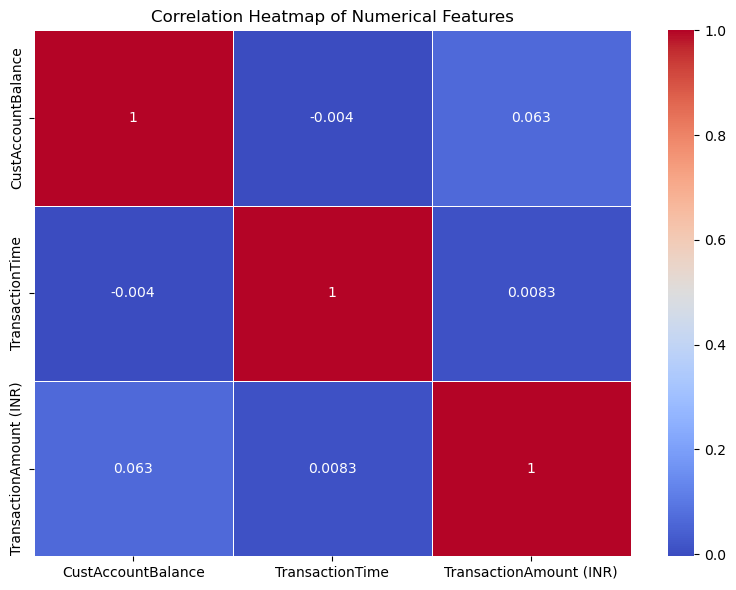

✅ Saved: correlation_heatmap.png


In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "correlation_heatmap.png"))
plt.show()
print("✅ Saved: correlation_heatmap.png")


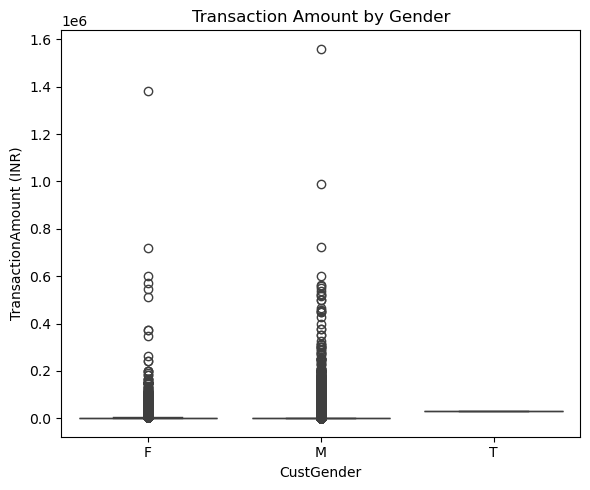

✅ Saved: gender_vs_transaction.png


In [47]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title("Transaction Amount by Gender")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "gender_vs_transaction.png"))
plt.show()
print("✅ Saved: gender_vs_transaction.png")


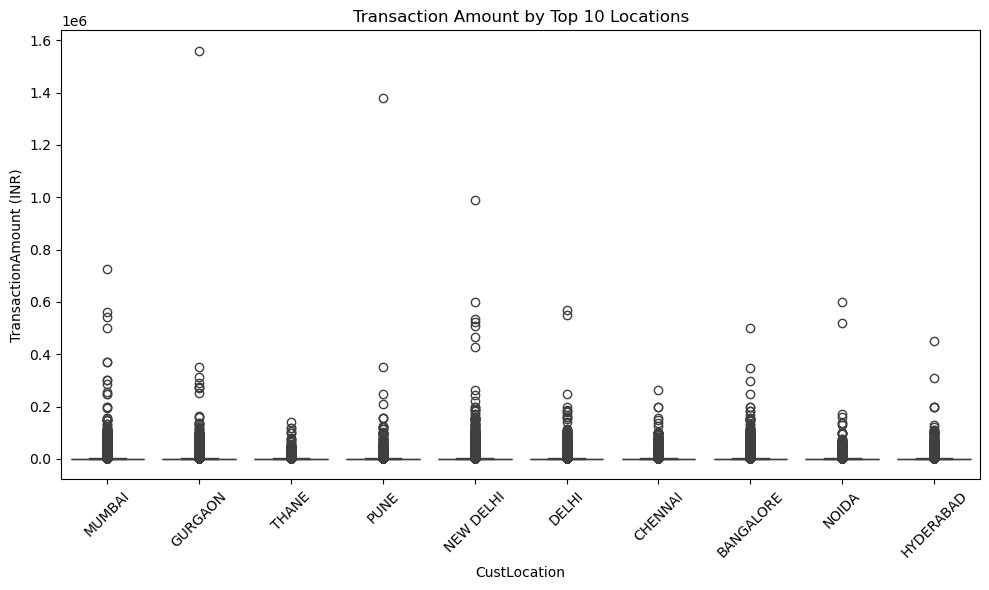

✅ Saved: location_vs_transaction.png


In [49]:
plt.figure(figsize=(10, 6))
top_locations = df['CustLocation'].value_counts().head(10).index
sns.boxplot(x='CustLocation', y='TransactionAmount (INR)', data=df[df['CustLocation'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title("Transaction Amount by Top 10 Locations")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "location_vs_transaction.png"))
plt.show()
print("✅ Saved: location_vs_transaction.png")


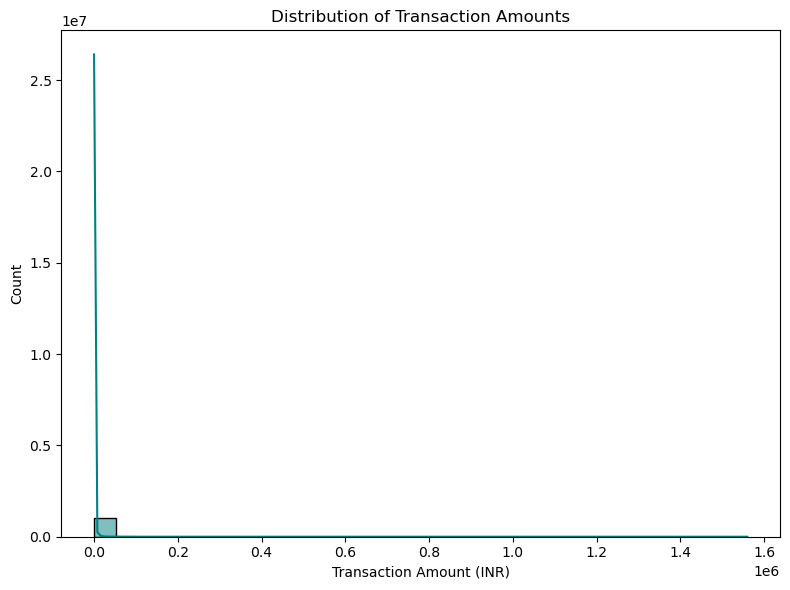

✅ Saved: transaction_amount_distribution.png


In [50]:
plt.figure(figsize=(8,6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, bins=30, color='teal')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "transaction_amount_distribution.png"))
plt.show()
print("✅ Saved: transaction_amount_distribution.png")


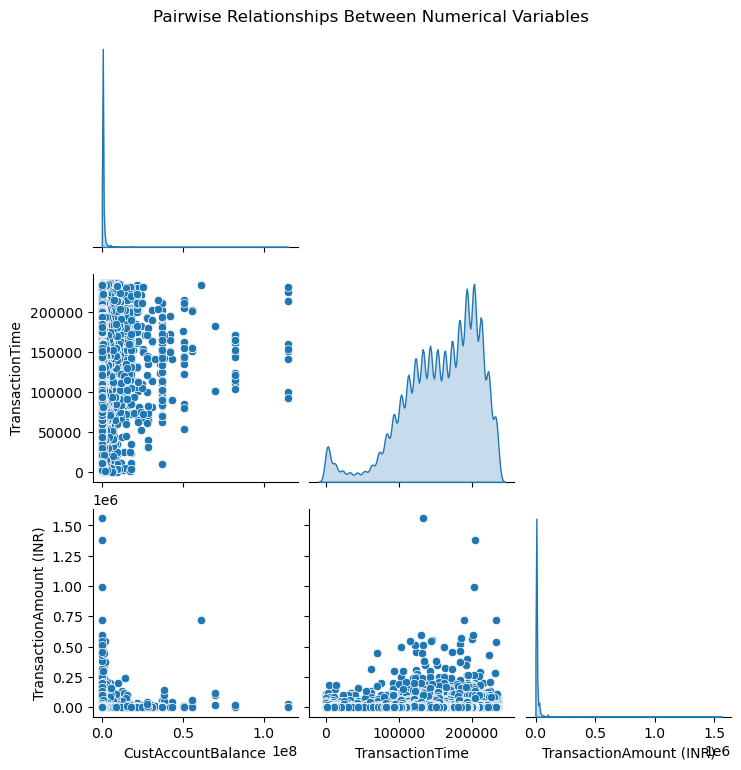

✅ Saved: pairplot_numeric_relationships.png


In [51]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02)
plt.savefig(os.path.join(vis_folder, "pairplot_numeric_relationships.png"))
plt.show()
print("✅ Saved: pairplot_numeric_relationships.png")


## Visualization Summary

All key data visualizations have been created and saved to the `visualization` folder, including:
- Correlation heatmap  
- Gender-based and location-based transaction patterns  
- Distribution and boxplots  
- Pie chart showing gender proportion  
- Pairplot showing relationships between numerical features  

These plots provide a comprehensive understanding of the dataset’s structure, 
trends, and relationships, supporting deeper business insights and model development.


In [52]:
import os
from datetime import datetime

# 1️⃣ Make sure you have your cleaned dataframe (df)
# If not already loaded, uncomment this:
# df = pd.read_csv("../output/cleaned_data_2025-10-16_1230.csv", low_memory=False)

# 2️⃣ Create output folder (if it doesn't exist)
output_folder = "../output"
os.makedirs(output_folder, exist_ok=True)

# 3️⃣ Create a timestamp for versioning
timestamp = datetime.now().strftime("%Y-%m-%d_%H%M")

# 4️⃣ Build output path and save
eda_path = os.path.join(output_folder, f"eda_data_{timestamp}.csv")
df.to_csv(eda_path, index=False)

print(f"✅ EDA dataset saved successfully to: {eda_path}")


✅ EDA dataset saved successfully to: ../output\eda_data_2025-10-16_1418.csv


In [56]:


# Load the EDA dataset
eda_df = pd.read_csv("../output/eda_data_2025-10-16_1418.csv", low_memory=False)


# Quick preview
eda_df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
